In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# use textwrap from python standard lib to help manage how the description 
# text shows up 
import textwrap

plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

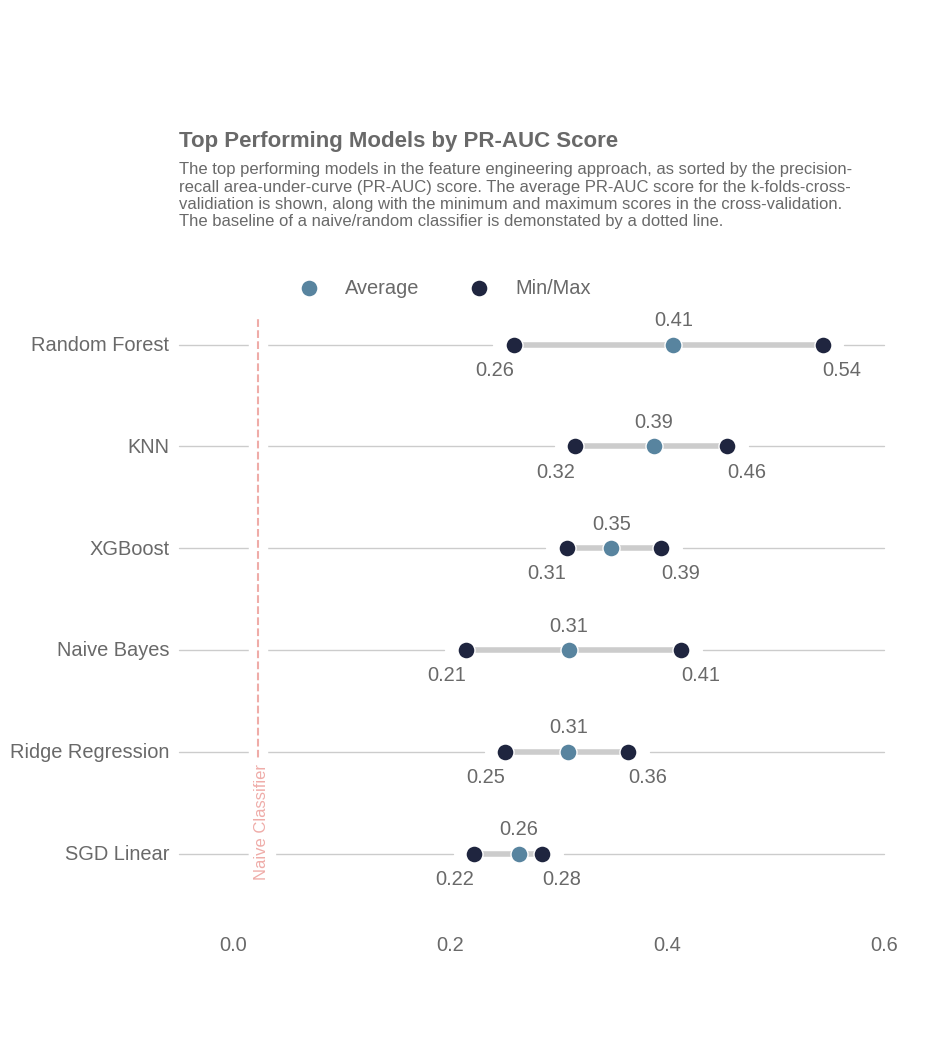

In [13]:

# load best results
df = pd.read_csv('best_results.csv')
df.head()

# sort the dataframe
df = df.sort_values(by='auc_avg', ascending=True).reset_index(drop=True)
df.head()

plt.style.use("seaborn-v0_8-whitegrid")  # set style because it looks nice
fig, ax = plt.subplots(1, 1, figsize=(10, 8),)

# color palette to choose from
darkblue = "#1f253f"
lightblue = "#58849f"
redish = "#d73027"

DOT_SIZE = 150

# create the various dots
# avg dot
ax.scatter(
    x=df["auc_avg"],
    y=df["clf_name"],
    s=DOT_SIZE,
    alpha=1,
    label="Average",
    color=lightblue,
    edgecolors="white",
)

# min dot
ax.scatter(
    x=df["auc_min"],
    y=df["clf_name"],
    s=DOT_SIZE,
    alpha=1,
    color=darkblue,
    label="Min/Max",
    edgecolors="white",
)

# max dot
ax.scatter(
    x=df["auc_max"],
    y=df["clf_name"],
    s=DOT_SIZE,
    alpha=1,
    color=darkblue,
    edgecolors="white",
)

# create the horizontal line
# between min and max vals
ax.hlines(
    y=df["clf_name"],
    xmin=df["auc_min"],
    xmax=df["auc_max"],
    color="grey",
    alpha=0.4,
    lw=4, # line-width
    zorder=0, # make sure line at back
)

x_min, x_max = ax.get_xlim()
y_min, y_max = ax.get_ylim()

# plot the line that shows how a naive classifier performs
# plot two lines, one white, so that there is a gap between grid lines
# from https://stackoverflow.com/a/12731750/9214620
ax.plot([0.023, 0.023], [y_min, y_max], linestyle="-", color="white", linewidth=14)
ax.plot([0.023, 0.023], [y_min, y_max], linestyle="--", color=redish, alpha=0.4)


# dictionary used to map the column labels from df to a readable name
label_dict = {
    "sgd_classifier": "SGD Linear",
    "xgboost_classifier": "XGBoost",
    "random_forest_classifier": "Random Forest",
    "knn_classifier": "KNN",
    "gaussian_nb_classifier": "Naive Bayes",
    "ridge_classifier": "Ridge Regression",
}

# iterate through each result and apply the text
# df should already be sorted
for i in range(0, df.shape[0]):
    # avg auc score
    ax.text(
        x=df["auc_avg"][i],
        y=i + 0.15,
        s="{:.2f}".format(df["auc_avg"][i]),
        horizontalalignment="center",
        verticalalignment="bottom",
        size="x-large",
        color="dimgrey",
        weight="medium",
    )

    # min auc score
    ax.text(
        x=df["auc_min"][i],
        y=i - 0.15,
        s="{:.2f}".format(df["auc_min"][i]),
        horizontalalignment="right",
        verticalalignment="top",
        size="x-large",
        color="dimgrey",
        weight="medium",
    )

    # max auc score
    ax.text(
        x=df["auc_max"][i],
        y=i - 0.15,
        s="{:.2f}".format(df["auc_max"][i]),
        horizontalalignment="left",
        verticalalignment="top",
        size="x-large",
        color="dimgrey",
        weight="medium",
    )

    # add thin leading lines towards classifier names
    # to the right of max dot
    ax.plot(
        [df["auc_max"][i] + 0.02, 0.6],
        [i, i],
        linewidth=1,
        color="grey",
        alpha=0.4,
        zorder=0,
    )
    
    # to the left of min dot
    ax.plot(
        [-0.05, df["auc_min"][i] - 0.02],
        [i, i],
        linewidth=1,
        color="grey",
        alpha=0.4,
        zorder=0,
    )

    # add classifier name text
    clf_name = label_dict[df["clf_name"][i]]
    ax.text(
        x=-0.059,
        y=i,
        s=clf_name,
        horizontalalignment="right",
        verticalalignment="center",
        size="x-large",
        color="dimgrey",
        weight="normal",
    )


# add text for the naive classifier
ax.text(
    x=0.023 + 0.01,
    y=(y_min),
    s="Naive Classifier",
    horizontalalignment="right",
    verticalalignment="bottom",
    size="large",
    color=redish,
    rotation="vertical",
    backgroundcolor="white",
    alpha=0.4,
)

# remove the y ticks
ax.set_yticks([])

# drop the gridlines (inherited from 'seaborn-whitegrid' style)
# and drop all the spines
ax.grid(False)  
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)

# custom set the xticks since this looks better
ax.set_xticks([0.0, 0.2, 0.4, 0.6])

# set properties of xtick labels
# https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.tick_params.html#matplotlib.axes.Axes.tick_params
ax.tick_params(axis="x", pad=20, labelsize="x-large", labelcolor="dimgrey")

# Add plot title and then description underneath it
plt_title = "Top Performing Models by PR-AUC Score"

plt_desc = (
    "The top performing models in the feature engineering approach, "
    "as sorted by the precision-recall area-under-curve (PR-AUC) score. "
    "The average PR-AUC score for the k-folds-cross-validiation is shown, "
    "along with the minimum and maximum scores in the cross-validation. The baseline"
    " of a naive/random classifier is demonstated by a dotted line."
)

# set the plot description
# use the textwrap.fill (from textwrap std. lib.) to
# get the text to wrap after a certain number of characters
PLT_DESC_LOC = 6.8
ax.text(
    x=-0.05,
    y=PLT_DESC_LOC,
    s=textwrap.fill(plt_desc, 90),
    horizontalalignment="left",
    verticalalignment="top",
    size="large",
    color="dimgrey",
    weight="normal",
    wrap=True,
)

ax.text(
    x=-0.05,
    y=PLT_DESC_LOC + 0.1,
    s=plt_title,
    horizontalalignment="left",
    verticalalignment="bottom",
    size=16,
    color="dimgrey",
    weight="semibold",
    wrap=True,
)

# create legend
ax.legend(
    frameon=False,
    bbox_to_anchor=(0.6, 1.05),
    ncol=2,
    fontsize="x-large",
    labelcolor="dimgrey",
)

# plt.savefig('best_results.svg',dpi=150, bbox_inches = "tight")
plt.show()


KeyError: 'lung'

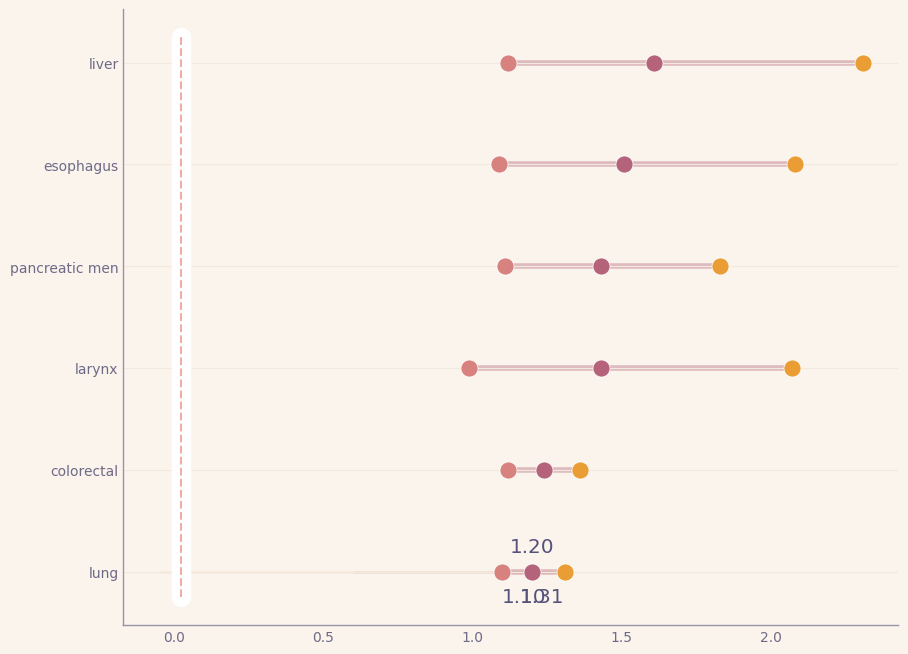

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# use textwrap from python standard lib to help manage how the description 
# text shows up 
import textwrap

# load best results
df = pd.read_csv('redmeat.csv')
df.head()

# sort the dataframe
df = df.sort_values(by='auc_avg', ascending=True).reset_index(drop=True)
df.head()

# plt.style.available
# plt.style.use("ggplot")  # set style because it looks nice
plt.style.use("rose-pine-dawn.mplstyle")
# plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-light.mplstyle')
fig, ax = plt.subplots(1, 1, figsize=(10, 8),)

# color palette to choose from
darkblue = "#1f253f"
lightblue = "#58849f"
redish = "#d73027"

DOT_SIZE = 150

# create the various dots
# avg dot
ax.scatter(
    x=df["auc_avg"],
    y=df["clf_name"],
    s=DOT_SIZE,
    alpha=1,
    label="Average",
    # color=lightblue,
    edgecolors="white",
)

# min dot
ax.scatter(
    x=df["auc_min"],
    y=df["clf_name"],
    s=DOT_SIZE,
    alpha=1,
    # color=darkblue,
    label="Min/Max",
    edgecolors="white",
)

# max dot
ax.scatter(
    x=df["auc_max"],
    y=df["clf_name"],
    s=DOT_SIZE,
    alpha=1,
    # color=darkblue,
    edgecolors="white",
)

# create the horizontal line
# between min and max vals
ax.hlines(
    y=df["clf_name"],
    xmin=df["auc_min"],
    xmax=df["auc_max"],
    # color="grey",
    alpha=0.4,
    lw=4, # line-width
    zorder=0, # make sure line at back
)

x_min, x_max = ax.get_xlim()
y_min, y_max = ax.get_ylim()

# plot the line that shows how a naive classifier performs
# plot two lines, one white, so that there is a gap between grid lines
# from https://stackoverflow.com/a/12731750/9214620
ax.plot([0.023, 0.023], [y_min, y_max], linestyle="-", color="white", linewidth=14)
ax.plot([0.023, 0.023], [y_min, y_max], linestyle="--", color=redish, alpha=0.4)


# dictionary used to map the column labels from df to a readable name
label_dict = {
    "sgd_classifier": "SGD Linear",
    "xgboost_classifier": "XGBoost",
    "random_forest_classifier": "Random Forest",
    "knn_classifier": "KNN",
    "gaussian_nb_classifier": "Naive Bayes",
    "ridge_classifier": "Ridge Regression",
}

# iterate through each result and apply the text
# df should already be sorted
for i in range(0, df.shape[0]):
    # avg auc score
    ax.text(
        x=df["auc_avg"][i],
        y=i + 0.15,
        s="{:.2f}".format(df["auc_avg"][i]),
        horizontalalignment="center",
        verticalalignment="bottom",
        size="x-large",
        # color="dimgrey",
        weight="medium",
    )

    # min auc score
    ax.text(
        x=df["auc_min"][i],
        y=i - 0.15,
        s="{:.2f}".format(df["auc_min"][i]),
        horizontalalignment="right",
        verticalalignment="top",
        size="x-large",
        # color="dimgrey",
        weight="medium",
    )

    # max auc score
    ax.text(
        x=df["auc_max"][i],
        y=i - 0.15,
        s="{:.2f}".format(df["auc_max"][i]),
        horizontalalignment="left",
        verticalalignment="top",
        size="x-large",
        # color="dimgrey",
        weight="medium",
    )

    # add thin leading lines towards classifier names
    # to the right of max dot
    ax.plot(
        [df["auc_max"][i] + 0.02, 0.6],
        [i, i],
        linewidth=1,
        # color="grey",
        alpha=0.4,
        zorder=0,
    )
    
    # to the left of min dot
    ax.plot(
        [-0.05, df["auc_min"][i] - 0.02],
        [i, i],
        linewidth=1,
        # color="grey",
        alpha=0.4,
        zorder=0,
    )

    # add classifier name text
    clf_name = label_dict[df["clf_name"][i]]
    ax.text(
        x=-0.059,
        y=i,
        s=clf_name,
        horizontalalignment="right",
        verticalalignment="center",
        size="x-large",
        # color="dimgrey",
        weight="normal",
    )


# add text for the naive classifier
ax.text(
    x=0.023 + 0.01,
    y=(y_min),
    s="Naive Classifier",
    horizontalalignment="right",
    verticalalignment="bottom",
    size="large",
    # color=redish,
    rotation="vertical",
    backgroundcolor="white",
    alpha=0.4,
)

# remove the y ticks
ax.set_yticks([])

# drop the gridlines (inherited from 'seaborn-whitegrid' style)
# and drop all the spines
ax.grid(False)  
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)

# custom set the xticks since this looks better
ax.set_xticks([0.0, 0.2, 0.4, 0.6])

# set properties of xtick labels
# https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.tick_params.html#matplotlib.axes.Axes.tick_params
ax.tick_params(axis="x", pad=20, labelsize="x-large", labelcolor="dimgrey")

# Add plot title and then description underneath it
plt_title = "Top Performing Models by PR-AUC Score"

plt_desc = (
    "The top performing models in the feature engineering approach, "
    "as sorted by the precision-recall area-under-curve (PR-AUC) score. "
    "The average PR-AUC score for the k-folds-cross-validiation is shown, "
    "along with the minimum and maximum scores in the cross-validation. The baseline"
    " of a naive/random classifier is demonstated by a dotted line."
)

# set the plot description
# use the textwrap.fill (from textwrap std. lib.) to
# get the text to wrap after a certain number of characters
PLT_DESC_LOC = 6.8
ax.text(
    x=-0.05,
    y=PLT_DESC_LOC,
    s=textwrap.fill(plt_desc, 90),
    horizontalalignment="left",
    verticalalignment="top",
    size="large",
    # color="dimgrey",
    weight="normal",
    wrap=True,
)

ax.text(
    x=-0.05,
    y=PLT_DESC_LOC + 0.1,
    s=plt_title,
    horizontalalignment="left",
    verticalalignment="bottom",
    size=16,
    # color="dimgrey",
    weight="semibold",
    wrap=True,
)

# create legend
ax.legend(
    frameon=False,
    bbox_to_anchor=(0.6, 1.05),
    ncol=2,
    fontsize="x-large",
    labelcolor="dimgrey",
)

# plt.savefig('best_results.svg',dpi=150, bbox_inches = "tight")
plt.show()
